The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API.  
The following question were answered in this project  
    1. What is the most awarded gender?  
    2. What are the top 10 most awarded countries?  
    3. what is the decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories?  
    4. what is the decade and category with the highest proportion of female lauretes?

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Finding the Most awarded gender 

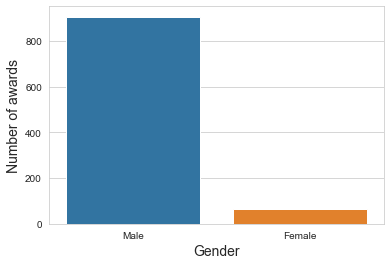

In [4]:
#to get the most commonly awarded gender, first we visualize it
sns.set_style("whitegrid")
ax = sns.countplot(x="sex", data=df)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of awards", fontsize=14)
plt.savefig("Gender.png") 
plt.show()

It can be seeen that the most awarded gender is Male

Most Awarded counrty of birth

### Finding top 10 most awarded country

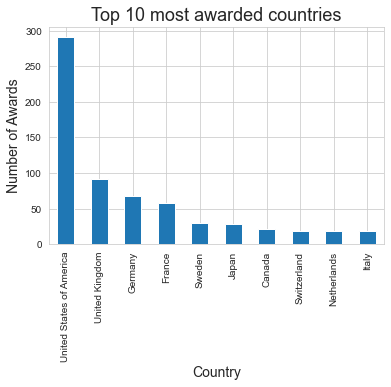

In [5]:
top_country = df["birth_country"].value_counts().head(10)
top_country.plot(kind="bar")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Awards", fontsize=14)
plt.title("Top 10 most awarded countries", fontsize=18)
plt.savefig("Country.png") 
plt.show()

It can be seen that USA is most awarded country

### Finding the decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories

In [6]:
df["US_born"] = df["birth_country"] == 'United States of America'


In [7]:
df["decade"] =(np.floor(df["year"]/10) * 10).astype(int)
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900


In [8]:
total_winners= df.groupby("decade")["US_born"].count()
US_born_winners = df[df["US_born"]].groupby("decade")["US_born"].count()
US_ratio = (US_born_winners/total_winners).reset_index(name='ratio').sort_values("ratio", ascending=False)
max_decade_usa = US_ratio["decade"].values[0]

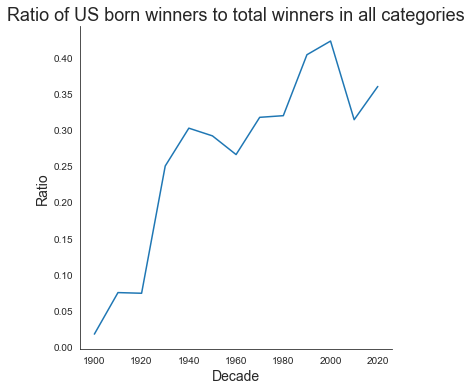

In [9]:
sns.set_style("white")
sns.relplot(x="decade", y="ratio", data=US_ratio, kind="line")
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
plt.title("Ratio of US born winners to total winners in all categories", fontsize=18)
plt.savefig("Ratio_of_US_winner.png") 
plt.show()

### Finding the decade and category with the highest proportion of female lauretes

In [10]:
df["Female_winner"] = df["sex"] == "Female"


In [11]:
total_per_group = df.groupby(["decade", "category"])["Female_winner"].count()
female_count = df[df["Female_winner"]].groupby(["decade", "category"])["Female_winner"].count()
female_proportion = (female_count/total_per_group).fillna(0).reset_index(name='proportion').sort_values("proportion", ascending=False)
female_proportion.head()

,decade,category,proportion
68,2020,Literature,0.500000
64,2010,Peace,0.357143
50,1990,Literature,0.300000
56,2000,Literature,0.300000
66,2020,Chemistry,0.300000


In [12]:
max_female_dict = {female_proportion["decade"].values[0]: female_proportion["category"].values[0]}
max_female_dict

{2020: 'Literature'}

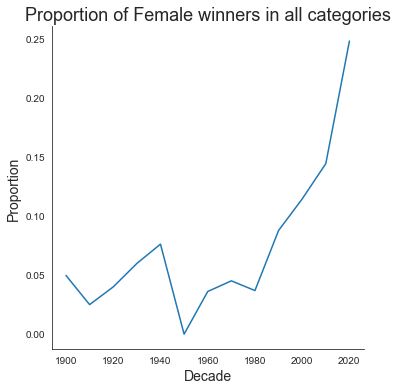

In [14]:
sns.relplot(x="decade", y="proportion", data=female_proportion, kind="line", ci=None)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.title("Proportion of Female winners in all categories", fontsize=18)
plt.savefig("Proportion_of_female_winner.png") 
plt.show()

It can be seen that the proportion of female winners increased significantly between the 1980's and 2020's

### Finding Repeated Winners

In [15]:
name_count = df["full_name"].value_counts().reset_index(name="count")
more_than_1 = name_count[name_count["count"] >1]
more_than_1

,index,count
0,Comité international de la Croix Rouge (Intern...,3
1,John Bardeen,2
2,Frederick Sanger,2
3,Linus Carl Pauling,2
4,Office of the United Nations High Commissioner...,2
5,"Marie Curie, née Sklodowska",2


In [16]:
repeat_list=[]
repeat_list.append(more_than_1["index"])

In [17]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born,decade,Female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False
